# Experiment 1 - Common use case, optimizing N threads

In [11]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run '/home/mark/Desktop/Plastic-Parallel-Programming/data_analysis/year 2/utilities.ipynb'

Program parameters:

In [12]:
folder_path1    = 'results/focustest4/'
number_of_runs  = 1
number_of_tests = 240

Set files to read

In [13]:
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")

Import the dataset

In [16]:
data = []
        
fetch_data(folder_path1, file_names, data, ["Runtime"])
        
dataset = []

kernel_repeats_min = 100
kernel_repeats_max = 1000
kernel_repeats_step = 100

grid_size_min = 32
grid_size_max = 128
grid_size_step = 32

num_workers_min = 8
num_workers_max = 32
num_workers_step = 8

implementation_min = 0
implementation_max = 1
implementation_step = 1

kernel_repeats_values = range(kernel_repeats_min, kernel_repeats_max + kernel_repeats_step, kernel_repeats_step)
grid_size_values = range(grid_size_min, grid_size_max + grid_size_step, grid_size_step)
num_workers_values = range(num_workers_min, num_workers_max + num_workers_step, num_workers_step)
num_workers_values.remove(24)
implementation_values = ["Reduced overhead", "Standard"]

nwv_len = len(num_workers_values)
gsv_len = len(grid_size_values)
krv_len = len(kernel_repeats_values)
imp_len = len(implementation_values)

kernel_repeats = kernel_repeats_values[0]
grid_size = grid_size_values[0]
num_workers = num_workers_values[0]
implementation = implementation_values[0]

for i in range(len(data)):
    num_workers = num_workers_values[i % nwv_len]
    grid_size = grid_size_values[(i // nwv_len) % gsv_len]
    kernel_repeats = kernel_repeats_values[(i // (nwv_len * gsv_len)) % krv_len]
    implementation = implementation_values[(i // (nwv_len * gsv_len * krv_len)) % imp_len]
    
    dataset.append([grid_size, num_workers, data[i].mean()[0], kernel_repeats, implementation])

dataset = pd.DataFrame(dataset)
dataset.columns = ["Grid Size", "Num Workers", "Time", "Kernel Repeats", "Implementation"]

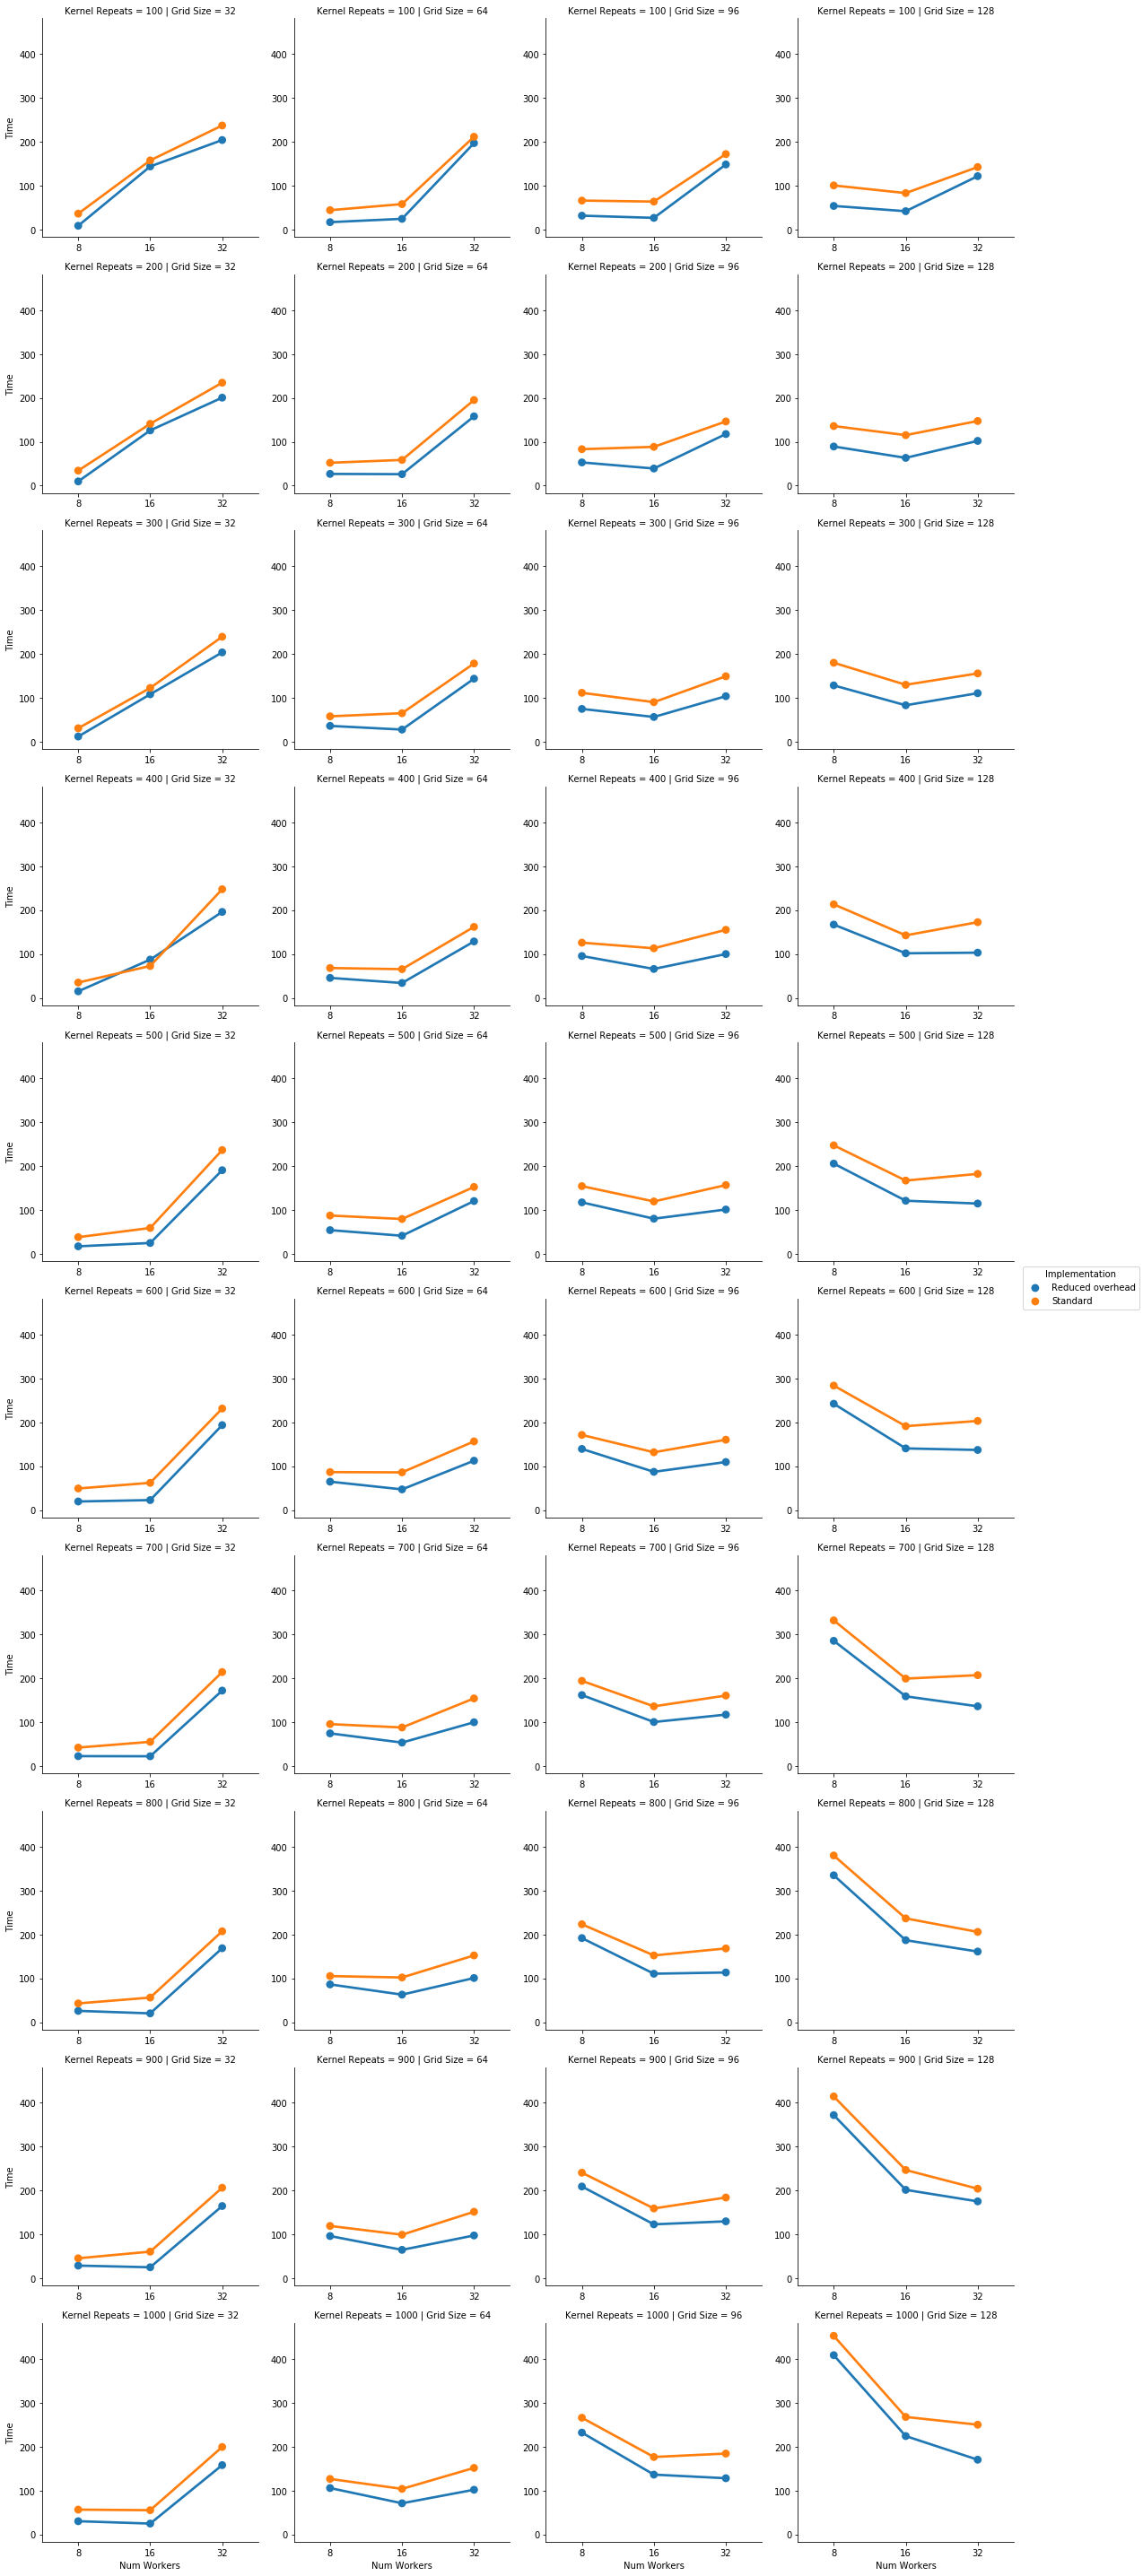

In [17]:
sns.factorplot(x="Num Workers", y="Time",
               row="Kernel Repeats",
               col="Grid Size",
               hue="Implementation",
               data=dataset);
plt.savefig("graphs/focustest4/focustest1.png")
plt.show()